Missing Values:
index             0
LOCATION          0
INDICATOR         0
SUBJECT           0
MEASURE           0
FREQUENCY         0
TIME              0
Value             0
Flag Codes    20566
dtype: int64
First few rows of the DataFrame:
   index LOCATION  INDICATOR SUBJECT   MEASURE FREQUENCY  TIME     Value  \
0      0      AUS  CROPYIELD    RICE  TONNE_HA         A  1990  8.314607   
1      1      AUS  CROPYIELD    RICE  TONNE_HA         A  1991  8.394737   
2      2      AUS  CROPYIELD    RICE  TONNE_HA         A  1992  8.094340   
3      3      AUS  CROPYIELD    RICE  TONNE_HA         A  1993  8.336000   
4      4      AUS  CROPYIELD    RICE  TONNE_HA         A  1994  8.537815   

   Flag Codes  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
              index          TIME         Value  Flag Codes
count  20566.000000  20566.000000  2.056600e+04         0.0
mean   10282.500000   2007.591170  1.249281e+04         NaN
std     5937.037154     1

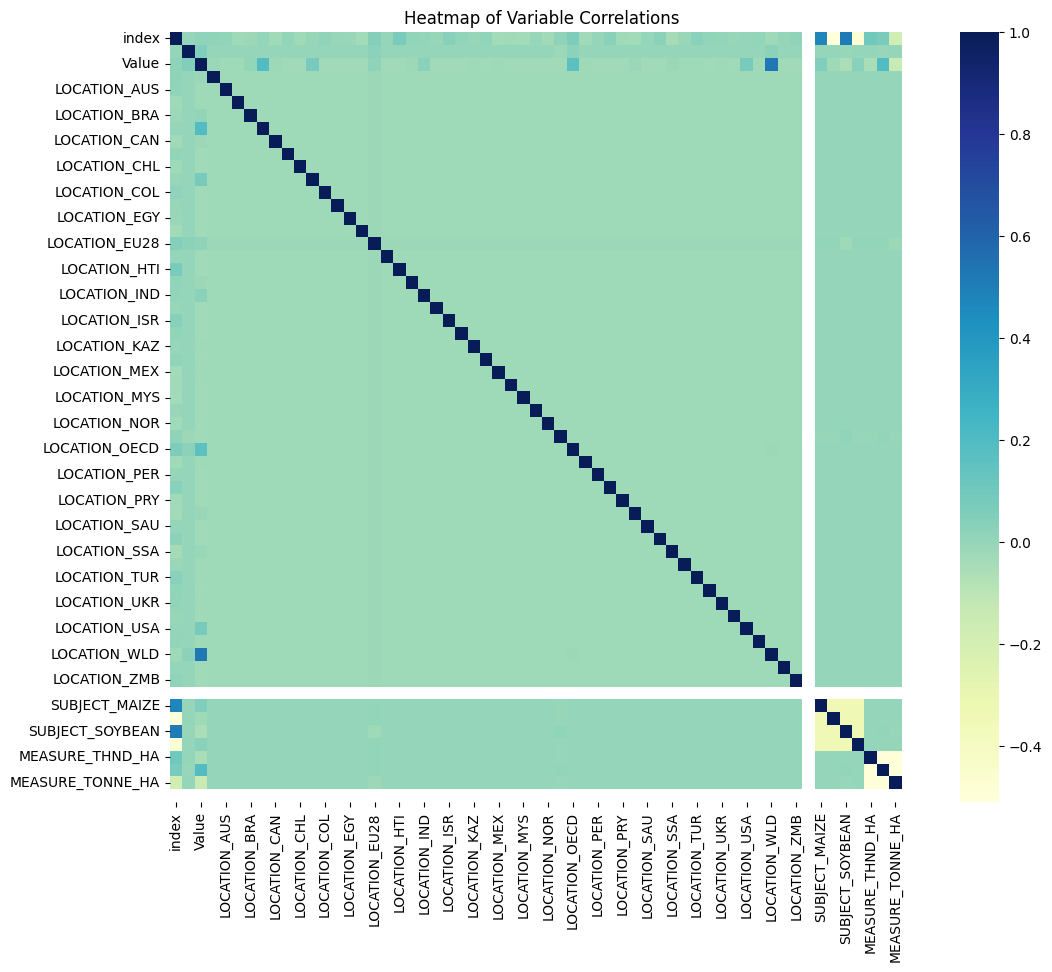

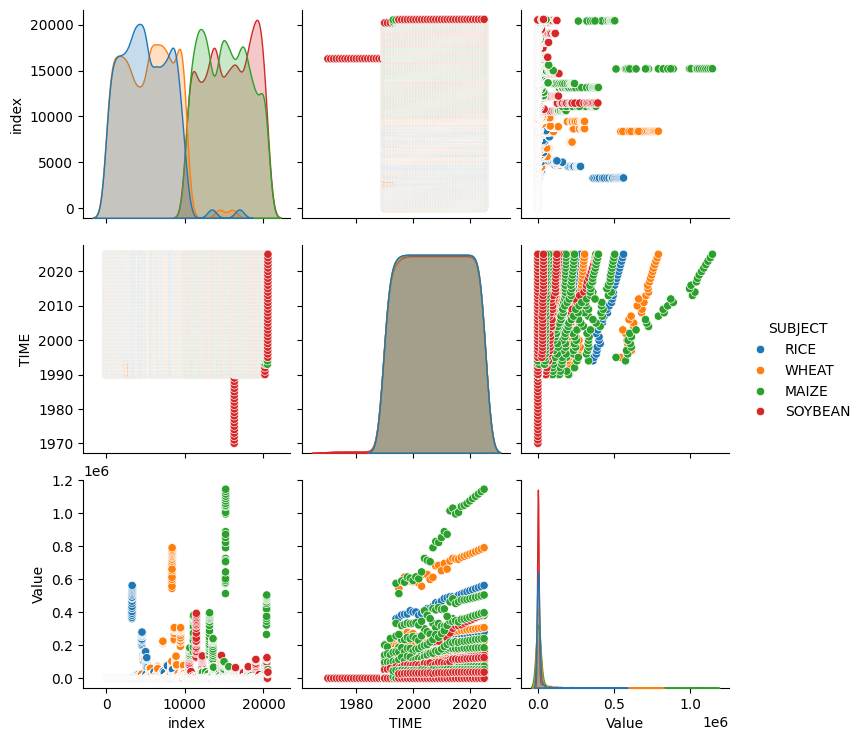

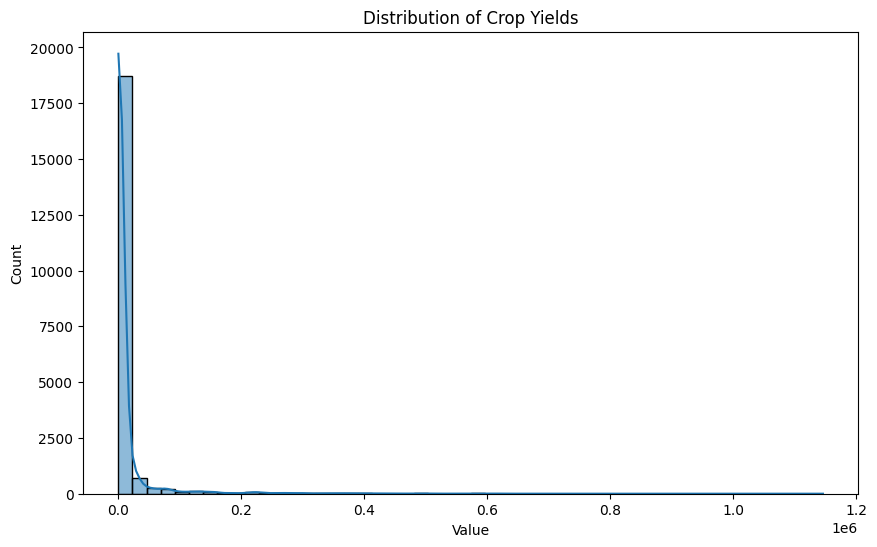

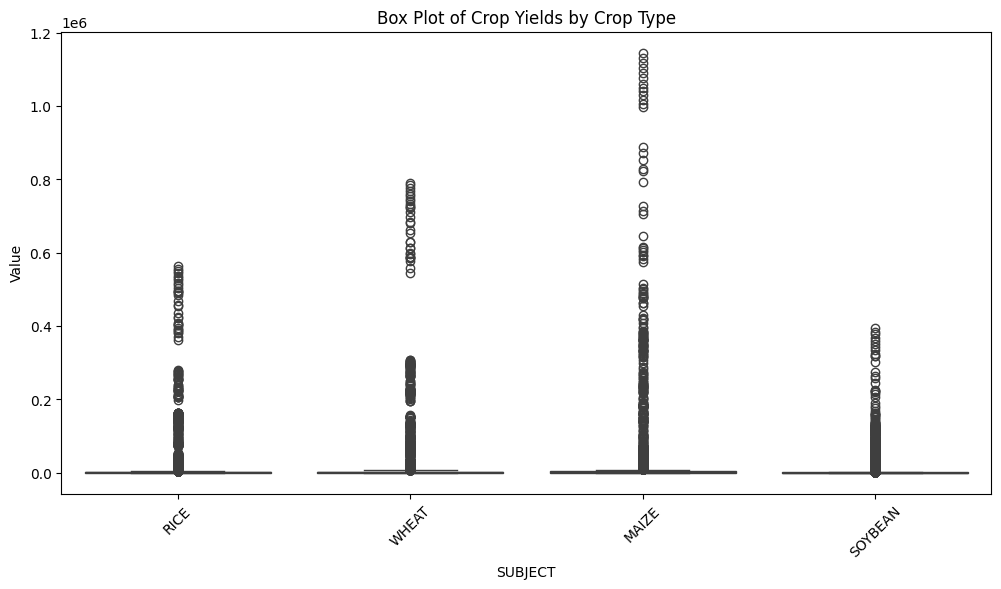

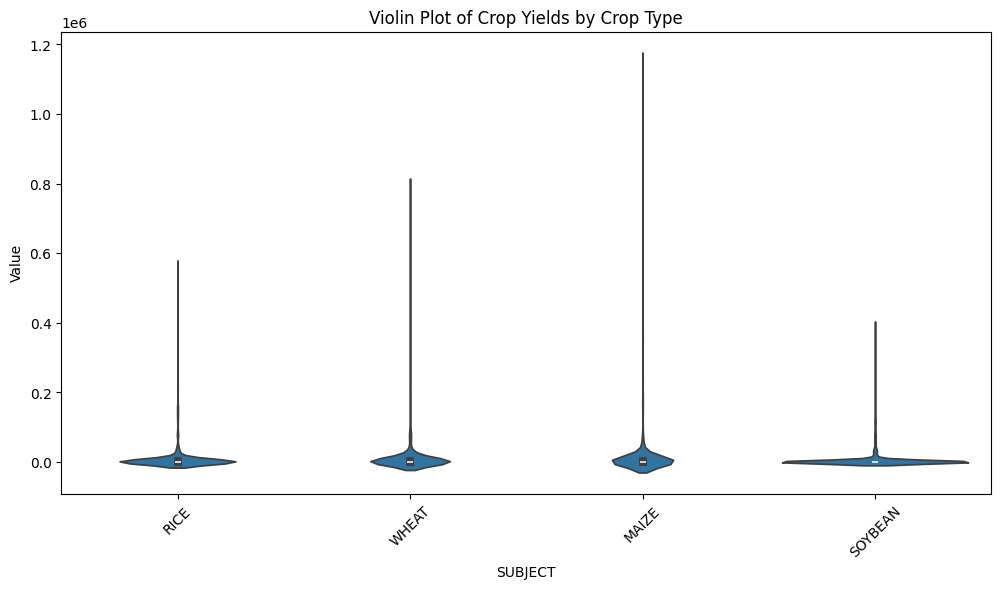

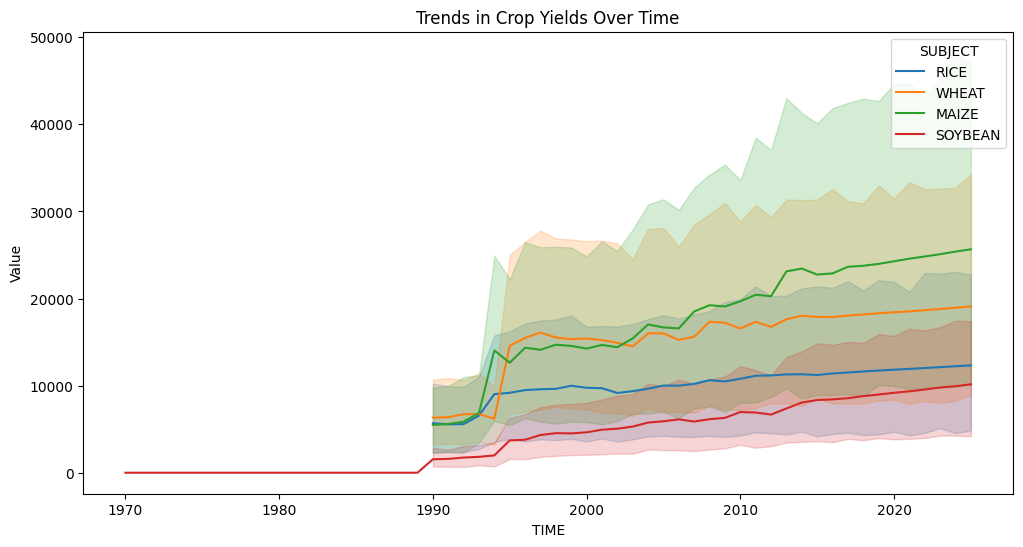

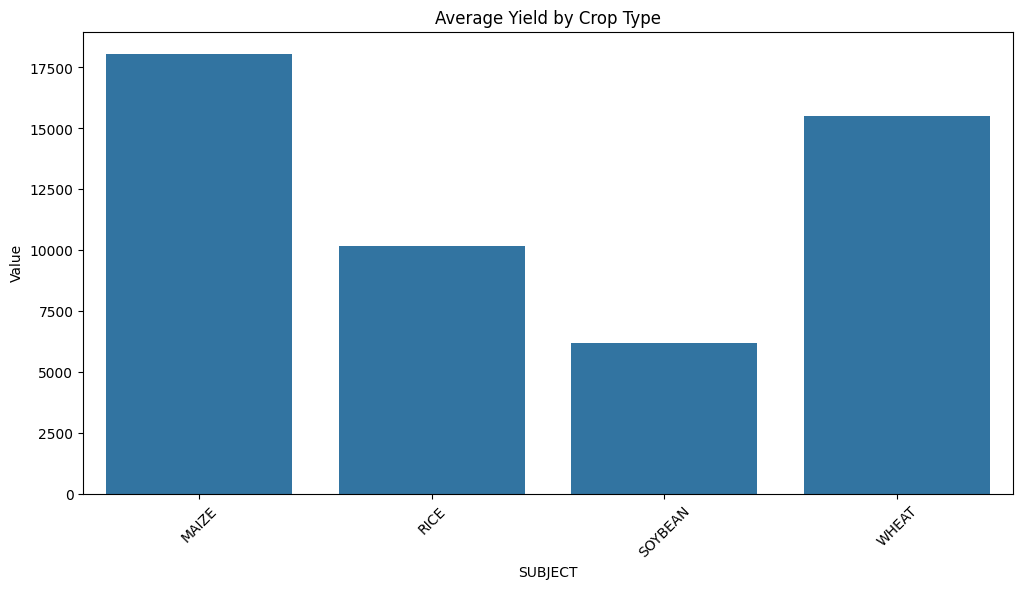

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample code to load and visualize data
data = pd.read_csv('crop_production.csv')  # Load data
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Display the first few rows of the DataFrame for a quick overview
print("First few rows of the DataFrame:")
print (data.head())

# Calculate summary statistics
print(data.describe())

# Drop 'Flag Codes' column
data = data.drop(columns=['Flag Codes'])

# Descriptive statistics
print(data.describe())

# Converting categorical variables to numeric values for correlation analysis
data_numeric = pd.get_dummies(data)

# Generating the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data_numeric.corr(), annot=False, cmap='YlGnBu')
plt.title('Heatmap of Variable Correlations')
plt.show()

#Generating the pairplot
sns.pairplot(data, hue="SUBJECT")
plt.show()

#1. Visualization - Histogram of 'Value'
plt.figure(figsize=(10, 6))
sns.histplot(data['Value'], bins=50, kde=True)
plt.title('Distribution of Crop Yields')
plt.show()

# 2. Box Plots and Violin Plots for different crops
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='SUBJECT', y='Value')
plt.title('Box Plot of Crop Yields by Crop Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='SUBJECT', y='Value')
plt.title('Violin Plot of Crop Yields by Crop Type')
plt.xticks(rotation=45)
plt.show()

# 3. Line Plots for crop yield trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='TIME', y='Value', hue='SUBJECT')
plt.title('Trends in Crop Yields Over Time')
plt.show()

# 4. Bar Graphs for average yields
average_yield = data.groupby('SUBJECT')['Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=average_yield, x='SUBJECT', y='Value')
plt.title('Average Yield by Crop Type')
plt.xticks(rotation=45)
plt.show()




In [23]:
import scipy.stats as stats
# Assuming 'Value' is the column for crop yield and 'SUBJECT' is the column for crop type
# We will perform ANOVA across different crop types

# Creating a list of crop yield values for each crop type
groups = data.groupby('SUBJECT')['Value'].apply(list).values

# Performing ANOVA test
anova_result = stats.f_oneway(*groups)

# Output the results
print("ANOVA Test Results:")
print("F-Statistic:", anova_result.statistic)
print("P-Value:", anova_result.pvalue)

# Interpretation
if anova_result.pvalue < 0.05:
    print("There are significant differences in crop yields among different crops.")
else:
    print("There are no significant differences in crop yields among different crops.")


ANOVA Test Results:
F-Statistic: 41.40273205903946
P-Value: 1.1503958338840233e-26
There are significant differences in crop yields among different crops.


We can also perform post-hoc test to find specifically which crops are significantly different.